# IMDb Top 10,000 Netflix Movies and Shows

End-to-End data analysis project by [Mayank Sharma](https://https://github.com/mayanksreal)

## Table of contents

1. [Introduction](https://colab.research.google.com/drive/1MjkuSKsKlbvSFJXcaqrCqojBa1fKl0oi#scrollTo=4c173daf&line=1&uniqifier=1)
2. [Required libraries](https://colab.research.google.com/drive/1MjkuSKsKlbvSFJXcaqrCqojBa1fKl0oi#scrollTo=aqhALGlq25Ig)
3. The problem domain
4. Step 1: Answering the question
5. Step 2: Checking the data
6. Step 3: Tidying the data
  - String Formatting Error
  - Inconsistent Year Formats
  - One-Line Columns
  - Restructuring Genre Column
  - Missing Values
7. Exploratory analysis
8. Conclusions

## Introduction

In the time it takes to scroll through Netflix and choose a show, thousands of new ratings, reviews, and streaming interactions are generated across the globe. Platforms like Netflix and IMDb continuously accumulate vast amounts of data about movies and TV shows — from audience ratings and genres to release years, runtimes, and popularity trends. Hidden within this data are powerful insights about viewer preferences, industry patterns, and the evolution of entertainment over time.

As the volume of entertainment data grows, so does the importance of Data Science in transforming raw information into meaningful stories. Drawing from disciplines such as statistics, programming, and domain knowledge in media analytics, Data Science allows us to clean, structure, analyze, and interpret complex datasets in a way that supports informed decision-making.

In this project, I will analyze and clean an extracted dataset of IMDb’s Netflix Top 10,000 movies and TV shows. The goal is to walk through a complete data analysis workflow — from data cleaning and preprocessing to exploratory analysis and insight generation — demonstrating how raw entertainment data can
be transformed into actionable understanding.

[Link to dataset](https://www.kaggle.com/datasets/bharatnatrayn/movies-dataset-for-feature-extracion-prediction)


**This notebook is made as a structured, end-to-end analysis learning project. If you identify areas for improvement, alternative interpretations, or additional insights worth exploring, comments and PR's are welcome.**

## Required Libraries

The primary libraries used are:

- **NumPy**: Provides a fast numerical array structure and helper functions.
- **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
- **scikit-learn**: The essential Machine Learning package in Python.
- **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
- **Seaborn**: Advanced statistical plotting library.

In [166]:
import kagglehub
path = kagglehub.dataset_download("bharatnatrayn/movies-dataset-for-feature-extracion-prediction")
print("Path to dataset:", path)

Using Colab cache for faster access to the 'movies-dataset-for-feature-extracion-prediction' dataset.
Path to dataset: /kaggle/input/movies-dataset-for-feature-extracion-prediction


## The Problem Domain

Our task is exploring and extracting insights from a large dataset of the IMDb Netflix Top 10,000 movies and TV shows. The dataset contains information such as title, year, genre, rating, votes, runtime, gross earnings, cast, and brief descriptions.

We are working with data sourced from IMDb and content available on Netflix. However, the raw dataset is not analysis-ready — it contains missing values, inconsistent formatting (newline characters in genres and descriptions), mixed data types (years with variants like “2010–2022”, "2010-", "2010"), and null values in several fields. *Therefore, a major component of this project involves data cleaning and preprocessing before performing meaningful analysis.*


Project objective is not to build a predictive model, but rather to:

- Clean and standardize the dataset
- Determine useful features
- Explore trends in ratings, genres, and release years
- Analyze relationships between ratings, votes, runtime, and gross revenue

## Step 1: Shaping Goal

The first step is to clearly define the problem and determine what the target is.

> The type of data analytic question?

This project is primarily:

- Exploratory – Understanding distributions of ratings, genres, runtimes, and release years.

- Descriptive – Summarizing trends in Netflix’s most popular or highest-rated content.

> The metric for success?

Since this is an exploratory data analysis (EDA) project, success will be measured by:

- Successfully cleaning and structuring messy raw data
- Reducing missing or inconsistent values
- Producing clear summary statistics and visualizations
- Identifying meaningful, data-supported insights

> The context for the question and its business application?

Streaming platforms like Netflix rely heavily on data-driven decision-making. Insights derived from IMDb rating trends, vote counts, genre distributions, and runtime preferences can help inform:

- Content acquisition strategies
- Investment in productions
- Marketing decisions
- Understanding audience engagement patterns

## Step 2: Checking the data

Let's take a look at the data we're working with.

Questions to answer:

- Is there anything wrong with the data?
- Are there any quirks with the data?
- Do we need to fix or remove any of the data?

Loading dataset into a pandas dataframe:

In [167]:
import pandas as pd
movies = pd.read_csv(f"{path}/movies.csv")
movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


The dataset is in a tabular format, and the first row defines the column headers:

*MOVIES, YEAR, GENRE, RATING, ONE-LINE, STARS, VOTES, RunTime, Gross*

which are descriptive enough to understand what each feature represents without needing documentation. Each row corresponds to a single title, either a movie or a TV show

However, dataset is not perfectly curated and requires careful inspection before analysis.

Next, it's always a good idea to look at the distribution of our data — especially the outliers.

Let's print out some summary statistics about the data set.

In [168]:
movies.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


We can see several useful values from this table. For example, we see that several entries are missing in both `RATING` and `RunTime`

Other than that, table like this is rarely useful unless we know that data should fall in a particular range.

It's better to visualize the data in some way. Visualization makes outliers and errors immediately stand out, whereas they might go unnoticed in a large table of numbers.

## Step 3: Tidying the data

Now that we've identified several errors in the data set, we need to fix them before we proceed with the analysis.

Let's walk through the issues one-by-one.



### 1. String Formatting Error

> Fields like 'GENRE', 'STARS', 'ONE-LINE' have unexpected '\n' characters, possibly due to issues in scrapping data.

We can use DataFrame to fix this.

In [169]:
movies['GENRE'][0]

'\nAction, Horror, Thriller            '

In [170]:
movies['STARS'][0]

'\n    Director:\nPeter Thorwarth\n| \n    Stars:\nPeri Baumeister, \nCarl Anton Koch, \nAlexander Scheer, \nKais Setti\n'

In [171]:
movies['ONE-LINE'][0]

'\nA woman with a mysterious illness is forced into action when a group of terrorists attempt to hijack a transatlantic overnight flight.'

Using python string functions **replace()** to remove newline and strip() to remove spaces in front and back

In [172]:
movies_format = movies.copy()
cols = ['GENRE','STARS','ONE-LINE']
for col in cols:
    movies_format[col] = movies_format[col].str.replace('\n','').str.strip()

In [173]:
print(movies_format['GENRE'][0])
print(movies_format['STARS'][0])
print(movies_format['ONE-LINE'][0])

Action, Horror, Thriller
Director:Peter Thorwarth|     Stars:Peri Baumeister, Carl Anton Koch, Alexander Scheer, Kais Setti
A woman with a mysterious illness is forced into action when a group of terrorists attempt to hijack a transatlantic overnight flight.


### 2. Inconsistent Year Formats

The YEAR column contains multiple formats:
(2001) → A movie
(2001–2007) → A completed TV series
(2021– ) or (2021–) → An ongoing TV series

Before analysis, we must:

- Remove parentheses

- Strip extra spaces

- Standardize dash formatting

- Engineer More Useful Features

In [174]:
movies['YEAR'][0:3]

,YEAR
0,(2021)
1,(2021– )
2,(2010–2022)


Instead of keeping YEAR as complex string, we create structured features:

> Start_Year

Extract the first year (e.g. 2001 from '2001-2006').

> End_Year

If format is 2001–2007 → End_Year = 2007

If format is 2021– → End_Year = 2021

If format is 2001 → End_Year = 2001

> Is_Movie

True if format is a single year (e.g., 2001)

False if a range exists

> Is_Ongoing

True if format is 2021– (no end year)

False otherwise

This transformation converts a messy string into structured, analysis-ready features that enable:

- Comparing movies vs series
- Analyzing trends in ongoing content
- Studying longevity of shows
- Examining production patterns over time

Let's start by removing '(' & ')' parenthesis and whitespaces, using replace and strip

In [175]:
movies_year = movies_format.copy()
movies_year['YEAR'] = movies_year['YEAR'].str.replace('(', '').str.replace(')', '').str.strip()
movies_year['YEAR'][0:3]

,YEAR
0,2021
1,2021–
2,2010–2022


Creating new features: `Start_Year` and `End_Year`

In [176]:
movies_year[['Start_Year', 'End_Year']] = (movies_year['YEAR'].str.split('–', expand=True))
movies_year['Start_Year'] = pd.to_numeric(movies_year['Start_Year'], errors='coerce')
movies_year['End_Year'] = pd.to_numeric(movies_year['End_Year'], errors='coerce')

Creating new Features `Is_Series` and `Is_Ongoing`

In [177]:
movies_year['Is_Series'] = movies_year['YEAR'].str.contains('–', na=False)
movies_year['Is_Ongoing'] = (movies_year['Is_Series'] & movies_year['End_Year'].isna())

Making `End_year` = `Start_year` for Movies, and On-going series to minimize NA/NULL values. We also drop String `Year` since useful features have already been extracted.

In [178]:
movies_year.loc[movies_year["Is_Series"].eq(False), "End_Year"] = movies_year["Start_Year"]
movies_year.loc[movies_year["Is_Series"] & movies_year["Is_Ongoing"], "End_Year"] = movies_year["Start_Year"]

movies_year.drop(columns=['YEAR'], inplace=True)

### 3. Dropping the ONE-LINE Column

The ONE-LINE column contains short textual descriptions of each title. Can be useful for NLP-based sentiment or keyword analysis, it does not fit well into this project.

**Decision:**
We will drop the ONE-LINE column to simplify the dataset and reduce unnecessary dimensionality.

In [179]:
movies_year = movies_year.drop(columns=['ONE-LINE'])

### 4. Unstructured STARS Column

The STARS column contains mixed-format strings such as:

> "Director: Augustine Frizzell | Stars: Shailene Woodley, Joe Alwyn, Wendy Nottingham, Felicity Jones"

Or,

> "Stars: Chase Stokes, Madelyn Cline, Madison Bailey, Jonathan Daviss"


Some issues in above format are:

- Director and actors are mentioned in single string.
- The format is inconsistent, sometimes including Director.

For meaningful analysis, this structure is not ideal. Therefore, we must decompose this column into structured features.

#### Extracting Director Column

If the string contains "Director:", we will extract the director’s name else insert NA. This gives us a clean Director column suitable for:

- Grouping by director
- Counting titles per director
- Average rating per director

In [180]:
movies_star = movies_year.copy()
movies_star['Director'] = movies_star['STARS'].str.extract(r'Director:\s*([^|]+)')
movies_star['Director'] = movies_star['Director'].str.strip()
movies_star.loc[movies_star['Director'].isna(), 'Director'] = 'NA'

#### Extracting Stars as Column

From the "Stars:" portion of the string, we can extract list of Stars in the movie or show, creating a structured Stars column containing a list/array of actor names.

This transformation allows:
- Grouping by Actor
- Studying most frequent actors
- Examining actor-rating relationships

In [181]:
# Removing director
movies_star['Stars_Clean'] = movies_star['STARS'].str.replace(r'Director:.*?\|', '', regex=True)

# Removing 'Stars:'
movies_star['Stars_Clean'] = movies_star['Stars_Clean'].str.replace('Stars:', '', regex=False).str.strip()
movies_star['Stars_List'] = movies_star['Stars_Clean'].str.split(',')

# Stripping whitespace
movies_star['Stars_List'] = movies_star['Stars_List'].apply(
    lambda x: [actor.strip() for actor in x] if isinstance(x, list) else x
)
movies_star.drop(columns=['STARS','Stars_Clean'], inplace=True)

#### Creating Star Count Feature

Once we have a clean list of actors, we compute star count per label

This engineered feature enables analysis such as:
- Do titles with larger casts receive higher ratings?
- Are movies associated with different cast sizes than series?
- Is there any relationship between star count and votes?

In [182]:
movies_star['Star_Count'] = movies_star['Stars_List'].apply(
    lambda x: len(x) if isinstance(x, list) else 0
)

In [183]:
movies_star.head()

,MOVIES,GENRE,RATING,VOTES,RunTime,Gross,Start_Year,End_Year,Is_Series,Is_Ongoing,Director,Stars_List,Star_Count
0,Blood Red Sky,"Action, Horror, Thriller",6.1,"21,062",121.0,NaN,2021.0,2021.0,False,False,Peter Thorwarth,"[Peri Baumeister, Carl Anton Koch, Alexander S...",4
1,Masters of the Universe: Revelation,"Animation, Action, Adventure",5.0,"17,870",25.0,NaN,2021.0,2021.0,True,True,NA,"[Chris Wood, Sarah Michelle Gellar, Lena Heade...",4
2,The Walking Dead,"Drama, Horror, Thriller",8.2,"885,805",44.0,NaN,2010.0,2022.0,True,False,NA,"[Andrew Lincoln, Norman Reedus, Melissa McBrid...",4
3,Rick and Morty,"Animation, Adventure, Comedy",9.2,"414,849",23.0,NaN,2013.0,2013.0,True,True,NA,"[Justin Roiland, Chris Parnell, Spencer Gramme...",4
4,Army of Thieves,"Action, Crime, Horror",NaN,NaN,NaN,NaN,2021.0,2021.0,False,False,Matthias Schweighöfer,"[Matthias Schweighöfer, Nathalie Emmanuel, Rub...",4


### 5. Restructuring `GENRE` Column

Now that we have cleaned newline characters from the GENRE column, we encounter another structural issue, genres are stored as a comma-separated string.

Such as,

>"Action, Horror, Thriller"

>"Drama, Romance"

>"Animation, Action, Adventure"

While readable, this format is not ideal for analysis. In its current form:

- We cannot easily count how many titles belong to each genre.
- We cannot compute average rating per genre.
- Multi-genre titles remain compressed into a single cell.

For platforms like Netflix multi-label categorical variables are common. However, data cleaning principles require each categorical value to be represented in a structured way.

Let's convert GENRE column into a List

In [184]:
movies_star['GENRE'] = movies_star['GENRE'].str.split(',')

# whitespace
movies_star['GENRE'] = movies_star['GENRE'].apply(
    lambda x: [genre.strip() for genre in x] if isinstance(x, list) else x
)

For genre-level analysis, we need a dataset where:

- Each row represents one title–genre pair
- Multi-genre titles appear multiple times (once per genre)

This process is called exploding the dataset. Let's do this on a different DataFrame meant for genre-level analysis only.

In [185]:
movies_genre = movies_star.copy()

movies_genre = movies_genre.explode('GENRE')
movies_genre.head()

,MOVIES,GENRE,RATING,VOTES,RunTime,Gross,Start_Year,End_Year,Is_Series,Is_Ongoing,Director,Stars_List,Star_Count
0,Blood Red Sky,Action,6.1,"21,062",121.0,NaN,2021.0,2021.0,False,False,Peter Thorwarth,"[Peri Baumeister, Carl Anton Koch, Alexander S...",4
0,Blood Red Sky,Horror,6.1,"21,062",121.0,NaN,2021.0,2021.0,False,False,Peter Thorwarth,"[Peri Baumeister, Carl Anton Koch, Alexander S...",4
0,Blood Red Sky,Thriller,6.1,"21,062",121.0,NaN,2021.0,2021.0,False,False,Peter Thorwarth,"[Peri Baumeister, Carl Anton Koch, Alexander S...",4
1,Masters of the Universe: Revelation,Animation,5.0,"17,870",25.0,NaN,2021.0,2021.0,True,True,NA,"[Chris Wood, Sarah Michelle Gellar, Lena Heade...",4
1,Masters of the Universe: Revelation,Action,5.0,"17,870",25.0,NaN,2021.0,2021.0,True,True,NA,"[Chris Wood, Sarah Michelle Gellar, Lena Heade...",4


/tmp/ipython-input-3438722267.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


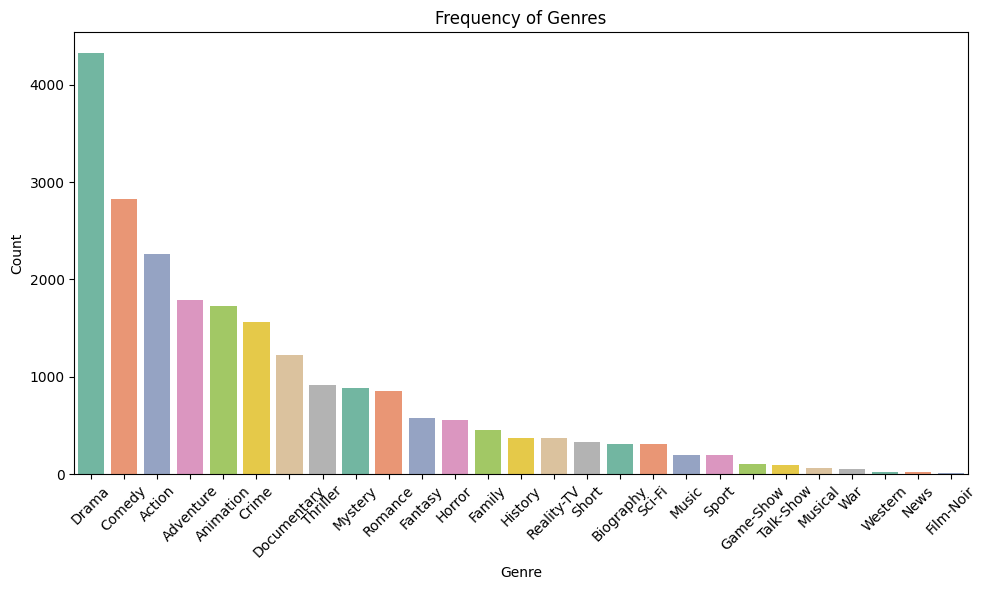

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

genre_counts = movies_genre['GENRE'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

plt.figure(figsize=(10,6))
sns.barplot(
    data=genre_counts,
    x='Genre',
    y='Count',
    palette='Set2'
)

plt.xticks(rotation=45)
plt.title('Frequency of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 6. Missing Values

After tidying and restructuring the dataset, the next critical step in the data analysis pipeline is assessing missing values.

Missing data is not just a technical inconvenience, it can introduce **bias, distort statistical summaries, and weaken model performance** if not handled thoughtfully.

In [187]:
movies_star.isnull().sum()


,0
MOVIES,0
GENRE,80
RATING,1820
VOTES,1820
RunTime,2958
Gross,9539
Start_Year,1692
End_Year,1687
Is_Series,0
Is_Ongoing,0


### Reasons for Missingness

Instead of randomly filling or dropping values, we must first understand why they are missing.

1. `GENRE` (80)

This is relatively small compared to the dataset size. Possible causes:
- Incomplete IMDb tagging
- Since genre is critical for our analysis, we may:

  - Drop rows if proportion is very small
  - label them as "Unknown"

In [188]:
movies_star['GENRE'] = movies_star['GENRE'].fillna('Unknown')

2. `RATING` and `VOTES` (~1820)

These two columns are missing together, which suggests titles may not yet have sufficient user ratings, such as for recently released content, Low-engagement titles.

Since the dataset is missing much of Revenue data and Rating is critical to primary analytical goal, we will drop missing value rows which will not be useful for this project.

In [189]:
movies_star = movies_star.dropna(subset=['RATING', 'VOTES'])


3. `RunTime` (2958)

Missing runtime could occur because:

- TV shows may not have consistent episode durations listed
- Data scraping inconsistencies
- Older or limited-release titles

For runtime analysis, we will impute movies to global mean of movies and shows to global mean of shows


In [190]:
movies_star.groupby('Is_Series')['RunTime'].mean()

,RunTime
Is_Series,
False,90.492119
True,39.310864


Movies have an average RunTime of ~90.4921 minutes and Series have that of ~39.3108 minutes (Per episode). Using Mean Impution:

In [191]:
movies_star.loc[(movies_star['Is_Series'] == False) & (movies_star['RunTime'].isna()), 'RunTime'] = 90.492119 # Movies
movies_star.loc[(movies_star['Is_Series'] == True) & (movies_star['RunTime'].isna()), 'RunTime'] = 39.310864 # Shows


4. `Gross` (9539)

This is most significant missingness. The majority of titles lack gross revenue due to data source not listing it largely.

Given the extremely high missing proportion, `Gross` cannot be used as a primary analytical variable, **financial analysis using this column would be highly biased** and it may be excluded from most analyses.



In [192]:
movies_clean = movies_star.copy()
movies_clean.drop(columns=['Gross'], inplace=True)

5. `Start_Year` and `End_Year` (~1690 each)

These were engineered from the `YEAR` column. In some cases, both Start_Year and End_Year are missing, likely due to missing values in the original YEAR column.

Shall rows where both values are missing should be explicitly marked as 0 (instead of remaining NaN), we can update them conditionally.

This preserves rows while clearly flagging incomplete temporal information.

In [196]:
# Condition mask
mask = movies_clean['Start_Year'].isna() & movies_year['End_Year'].isna()
movies_clean.loc[mask, ['Start_Year', 'End_Year']] = 0


# Condition: Start_Year is NA and End_Year is not NA
mask = movies_clean['Start_Year'].isna() & movies_clean['End_Year'].notna()
movies_clean.loc[mask, 'Start_Year'] = movies_clean.loc[mask, 'End_Year']

We have removed or flagged all missing values, and have a clean data.

**Important to note:**

- 1690 values miss both `Start_Date` and `End_Date` and have been marked as 0.
- 80 values missing `GENRE` have been marked as 'Unknown'

## Exploratory Analysis

## Visualization

## Conclusions

In [ ]:
df_feature.shape

In [ ]:
df_feature.isnull().sum()

### Average Rating by Genre

In [ ]:
genre_avg = (
    df_exploded
        .groupby("GENRE", as_index=False)["RATING"]
        .mean()
        .rename(columns={"RATING": "Avg_Rating"})
        .sort_values("Avg_Rating")
)

plt.figure(figsize=(10, 8))

ax = sns.barplot(
    data=genre_avg,
    x="Avg_Rating",
    y="GENRE",
    palette="Set2"
)

plt.xlim(5.5, 7.5)


for i, value in enumerate(genre_avg["Avg_Rating"]):
    ax.text(
        value + 0.02,
        i,
        f"{value:.2f}",
        va='center'
    )

plt.tight_layout()
plt.show()

### Popularity vs Votes
Shows no clear bias between highly-rated and high-voted

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_feature, x="VOTES", y="RATING")
plt.xscale("log")
plt.title("Rating vs Votes")
plt.show()

### Average Rating Over Time

In [ ]:
year_rating = (
    df_feature
        .groupby("Start_Year", as_index=False)["RATING"]
        .mean()
)

plt.figure(figsize=(10,6))
sns.lineplot(data=year_rating, x="Start_Year", y="RATING")
plt.title("Average Rating Over Time")
plt.show()


TO minimize fluctuations,

### Average Rating by Decade

In [ ]:
decade_avg = (
    df_feature
        .assign(Decade=(df_feature["Start_Year"] // 10) * 10)
        .groupby("Decade", as_index=False)["RATING"]
        .mean()
        .sort_values("Decade")
)

plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    data=decade_avg,
    x="Decade",
    y="RATING",
    marker="o"
)

plt.title("Average Rating by Decade")
plt.xlabel("Decade")
plt.ylabel("Average Rating")
plt.ylim(5.5, 7.5)

for x, y in zip(decade_avg["Decade"], decade_avg["RATING"]):
    ax.text(
        x,
        y + 0.05,
        f"{y:.2f}",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()


### Genre Count vs Rating
Multi-genre movies seem to perform better for this dataset

In [ ]:
genrecount_avg = (
    df_feature
        .groupby("Genre_Count", as_index=False)["RATING"]
        .mean()
        .sort_values("Genre_Count")
)

plt.figure(figsize=(8, 6))

ax = sns.barplot(
    data=genrecount_avg,
    x="Genre_Count",
    y="RATING",
    palette="Set2"
)

plt.title("Average Rating by Number of Genres")
plt.xlabel("Number of Genres")
plt.ylabel("Average Rating")
plt.ylim(6, 7.5)

for i, value in enumerate(genrecount_avg["RATING"]):
    ax.text(i, value + 0.02, f"{value:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df_feature,
    x="RunTime",
    y="RATING"
)

plt.title("Runtime vs Rating")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

Zoomed-in

In [ ]:
sns.scatterplot(
    data=df_feature,
    x="RunTime",
    y="RATING"
)

plt.title("Runtime vs Rating")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Rating")
plt.tight_layout()
plt.xlim(0,200)
plt.show()

Slope

In [ ]:
plt.figure(figsize=(8, 6))

sns.regplot(
    data=df_feature,
    x="RunTime",
    y="RATING",
    scatter=False
)

plt.title("Runtime vs Rating")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


### Movies made over Years

In [ ]:
year_count = df_feature["Start_Year"].value_counts().sort_index()

plt.figure(figsize=(10,6))
year_count.plot()
plt.title("Movies over Years")
plt.show()